##Q 다음 분기에 어떤 게임을 설계해야 할까?

주어진 데이터:게임 이름/플랫폼/출시 연도/장르/제작 회사/지역 별(북미, 유럽, 일본, 기타) 출고량


##1.데이터 전처리

In [2]:
#데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
#데이터셋 불러오기
import pandas as pd 
df=pd.read_csv('vgames2.csv')
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.columns=['게임 이름','플랫폼','출시 연도','장르','제작 회사','북미지역 출고량', '유럽지역 출고량','일본지역 출고량','기타지역 출고량']
df

,게임 이름,플랫폼,출시 연도,장르,제작 회사,북미지역 출고량,유럽지역 출고량,일본지역 출고량,기타지역 출고량
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
#결측치 확인
df.isnull().sum()

게임 이름         0
플랫폼           0
출시 연도       271
장르           50
제작 회사        58
북미지역 출고량      0
유럽지역 출고량      0
일본지역 출고량      0
기타지역 출고량      0
dtype: int64

In [5]:
#결측치 제거
df=df.dropna()
df.head()

,게임 이름,플랫폼,출시 연도,장르,제작 회사,북미지역 출고량,유럽지역 출고량,일본지역 출고량,기타지역 출고량
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
#데이터 타입 확인
df.dtypes

게임 이름        object
플랫폼          object
출시 연도       float64
장르           object
제작 회사        object
북미지역 출고량     object
유럽지역 출고량     object
일본지역 출고량     object
기타지역 출고량     object
dtype: object

In [7]:
#출고량 데이터 타입 변환, 숫자(K,M) 단위 통일
def f(x):
  if 'K' in x:
    x = x[:len(x)-1]
    x = float(x)*1000
  elif 'M' in x:
    x = x[:len(x)-1] 
    x = float(x)*1000000
  else:
    x = float(x)*1000000
  return x

for col in ['북미지역 출고량','유럽지역 출고량','일본지역 출고량','기타지역 출고량']:
  df[col] = df[col].apply(f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
#출고량 데이터 타입 변환 확인
df.dtypes

게임 이름        object
플랫폼          object
출시 연도       float64
장르           object
제작 회사        object
북미지역 출고량    float64
유럽지역 출고량    float64
일본지역 출고량    float64
기타지역 출고량    float64
dtype: object

In [9]:
#출시 연도 통일 - 먼저 int로 타입 변환
df = df.astype({'출시 연도': 'int'})
print(df.dtypes)

게임 이름        object
플랫폼          object
출시 연도         int64
장르           object
제작 회사        object
북미지역 출고량    float64
유럽지역 출고량    float64
일본지역 출고량    float64
기타지역 출고량    float64
dtype: object


In [10]:
#한 자리수/두 자리수 출시 연도 개수 확인 
a=len(list(filter(lambda x: x < 10, df['출시 연도']))) #한 자리수 출시 연도 데이터
b=len(list(filter(lambda x: 10 <= x <= 20, df['출시 연도']))) #두 자리수 출시 연도 데이터(10~20)
c=len(list(filter(lambda x: 20 < x < 100, df['출시 연도']))) #두 자리수 출시 연도 데이터(20<x<100)
print(a,b,c)

53 33 14


In [11]:
#출시 연도 통일 - 구간 나눠 1900, 2000 더해주기
def f(x):
  if x <= 20:
    x = x + 2000
  elif 20 < x <100: 
    x = x + 1900
  else:
    x = x
    return x

df['출시 연도']=df['출시 연도'].apply(f)

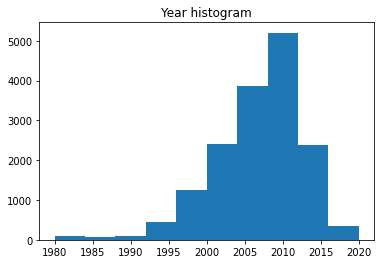

In [12]:
#출시 연도 통일 - 히스토그램 확인
import matplotlib.pyplot as plt
plt.hist(df['출시 연도'])
plt.title('Year histogram')
plt.show();

##2. 데이터 분석

지역에 따라서 선호하는 게임 장르가 다를까,
연도별 게임의 트렌드가 있을까,
출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,950 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [1]:
!sudo pip3 install --upgrade scipy

     |████████████████████████████████| 27.4MB 143kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


####1. 지역에 따라서 선호하는 게임의 장르가 다를까?

In [14]:
#각 지역에서 어떤 장르가 가장 출고량이 많을까?  
df_장르=df.groupby('장르').sum()
df_장르.drop(['출시 연도'],axis=1, inplace=True)

a=df_장르['북미지역 출고량'].idxmax() #각 지역에서 출고량이 가장 큰 장르 추출
b=df_장르['유럽지역 출고량'].idxmax()
c=df_장르['일본지역 출고량'].idxmax()
d=df_장르['기타지역 출고량'].idxmax()
print(a,b,c,d)

Action Action Role-Playing Action


In [15]:
#각 지역에서 어떤 장르가 가장 출고량이 많을까? 
df_장르2=df.groupby('장르').mean() 
df_장르2.drop(['출시 연도'],axis=1, inplace=True)

a=df_장르2['북미지역 출고량'].idxmax() #각 지역에서 평균적으로 출고량이 가장 큰 장르 추출
b=df_장르2['유럽지역 출고량'].idxmax()
c=df_장르2['일본지역 출고량'].idxmax()
d=df_장르2['기타지역 출고량'].idxmax()
print(a,b,c,d)

Platform Shooter Role-Playing Shooter


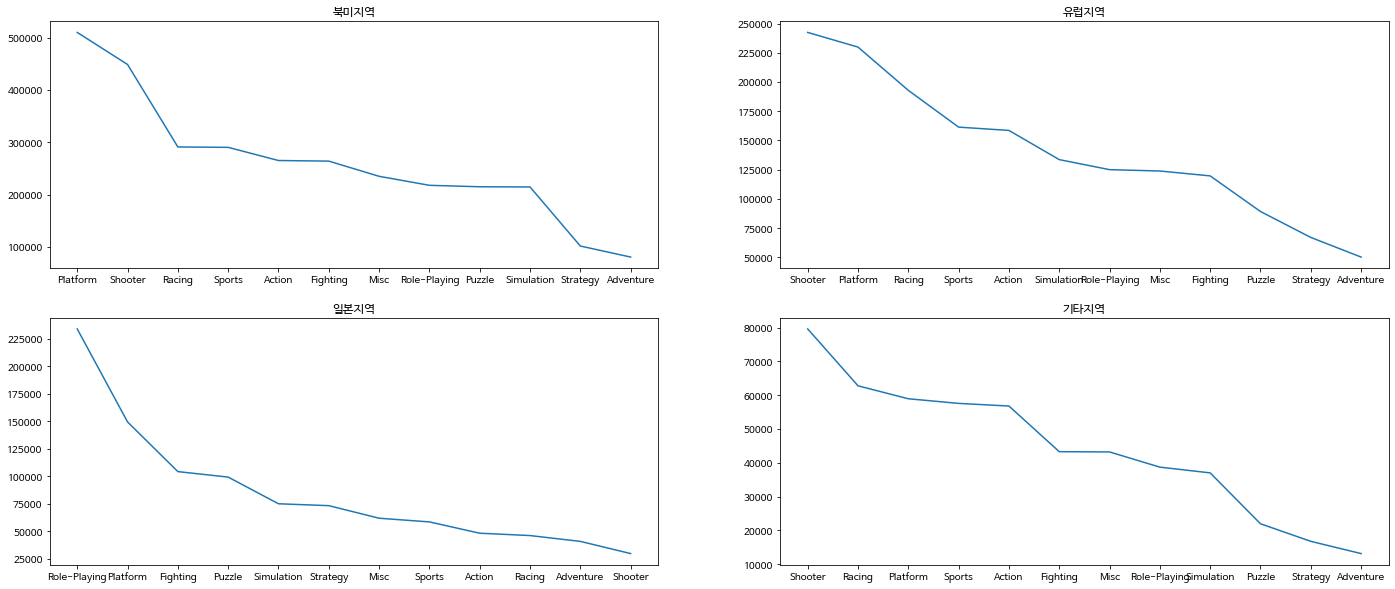

In [16]:
#각 지역 장르 별 출고량 확인(mean) - 그래프
n = df.groupby(['장르'])['북미지역 출고량'].mean().sort_values(ascending=False) #북미지역: platform>shooter>sports>racing 장르 순으로 출고량이 많다.
e = df.groupby(['장르'])['유럽지역 출고량'].mean().sort_values(ascending=False) #유럽지역: shooter>platform>racing>sports 장르 순으로 출고량이 많다.
j = df.groupby(['장르'])['일본지역 출고량'].mean().sort_values(ascending=False) #일본지역: role-playing>platform>fighting>puzzle 장르 순으로 출고량이 많다.
o = df.groupby(['장르'])['기타지역 출고량'].mean().sort_values(ascending=False) #기타지역: shooter>racing>platform>sports 장르 순으로 출고량이 많다.

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(24,10))

ax[0,0].plot(n)
ax[0,0].set_title('북미지역')
ax[0,1].plot(e)
ax[0,1].set_title('유럽지역')
ax[1,0].plot(j)
ax[1,0].set_title('일본지역')
ax[1,1].plot(o)
ax[1,1].set_title('기타지역')

plt.show()

각 지역 게임 출고량을 장르 별로 분석해보았다. 북미지역은 Platform, 유럽지역은 Shooter, 일본지역은 Role-Playing, 기타지역은 Shooter이 평균적으로 큰 출고량을 차지했다.

그래프를 통해 확인한 결과, 북미지역은 platform>shooter>sports>racing 장르 순으로, 유럽지역은 shooter>platform>racing>sports 장르 순으로, 일본지역은 role-playing>platform>fighting>puzzle 장르 순으로, 기타지역은 shooter>racing>platform>sports 장르 순으로 출고량이 많았다.

즉, 일본 지역을 제외한 나머지 세 지역에서는 platform, shooter, sports, racing이 출고량이 높았고 이를 제외한 다른 장르의 출고량도 거의 비슷한 형태를 보였다. 단, 일본 지역의 경우 role-playing이 가장 출고량이 높았다. 즉, 일본지역을 제외한 다른 지역에서는 선호하는 게임 장르가 유사하다고 할 수 있다.

####2. 연도별 게임의 트렌드가 있을까?




In [17]:
#연도 별 게임 전체 트렌드 - 연도 별 총 출고량 확인 -> 이를 통해 시기에 따른 전체 게임 트렌드를 알 수 있다.
df['총 출고량']=df['북미지역 출고량']+df['유럽지역 출고량']+df['일본지역 출고량']+df['기타지역 출고량'] #'총 출고량'이라는 새 Feature 생성

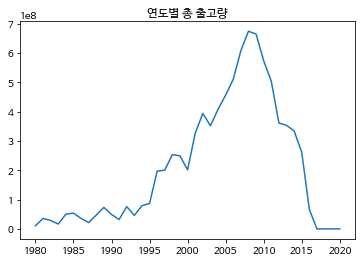

In [18]:
plt.plot(df.groupby('출시 연도')['총 출고량'].sum())
plt.title('연도별 총 출고량')
plt.show()

북미지역, 유럽지역, 일본지역, 기타지역의 출고량을 다 합해 총 출고량이라는 새로운 Feature을 생성한 후, 연도 별 총 출고량을 확인한 결과, 과거부터 출고량이 지속적으로 상승하다가 1995년부터 급격히 상승하여 2007-2009년 전 후로 정점을 찍고, 급격히 출고량이 감소하는 양상을 보인다.

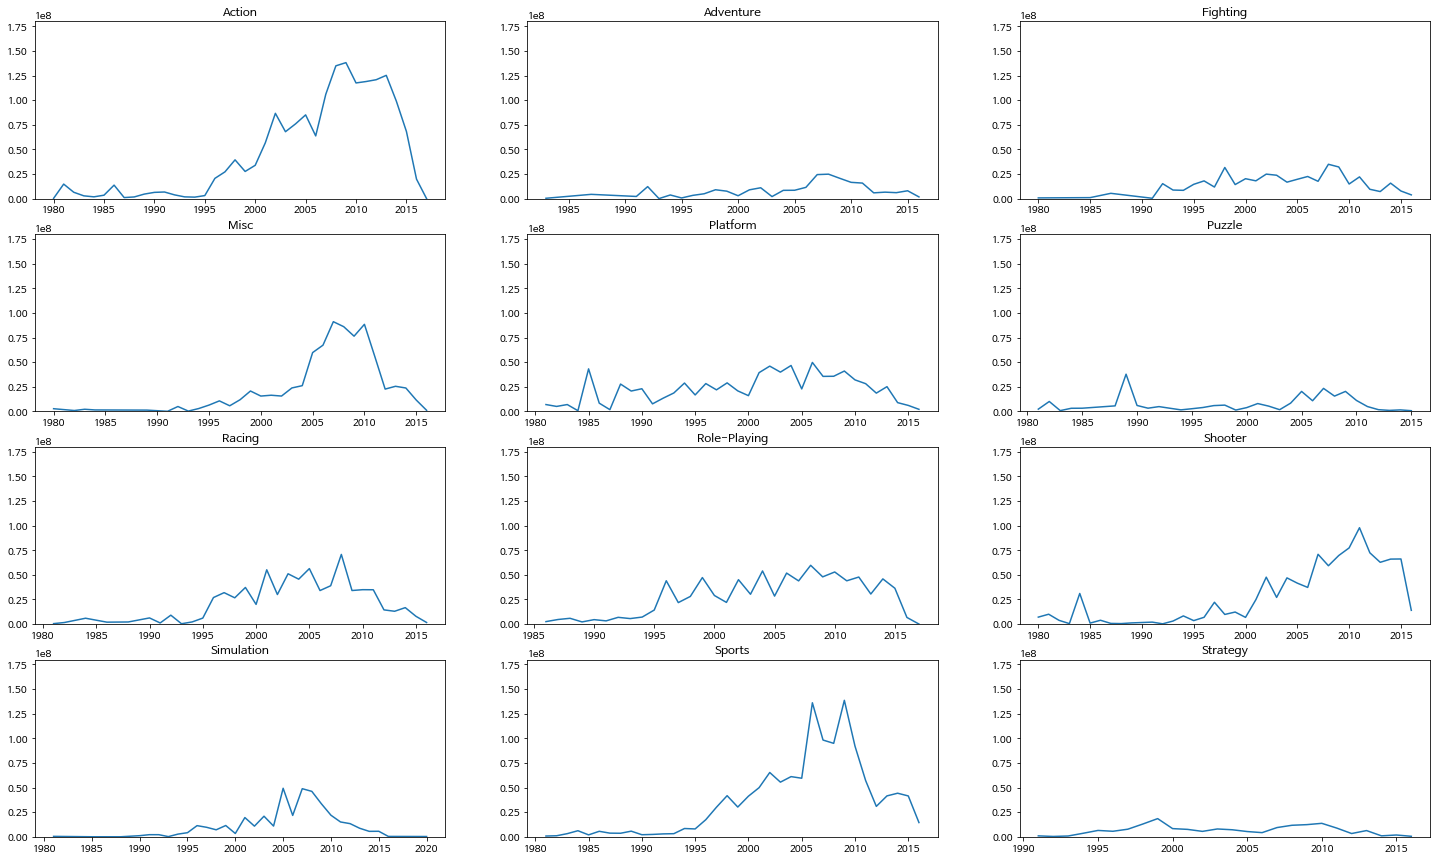

In [49]:
#연도 별 게임 장르 트렌드 - 연도 별로 각 장르의 총 출고량 확인
장르 = list(df['장르'].unique())
장르.sort()

fig,ax=plt.subplots(nrows=4,ncols=3,figsize=(25,15))

for i, gen in enumerate(장르):
  if i<=2:
    r=0
  elif i>2 and i <= 5:
    r=1
  elif i>5 and i <= 8:
    r=2
  elif i>8 and i <= 11:
    r=3

  j = i % 3

  data = df[df['장르'] == gen]
  data2 = data.groupby('출시 연도')['총 출고량'].sum()

  ax[r,j].plot(data2)
  ax[r,j].set_title(gen)
  ax[r,j].set_ylim(0,180000000)

plt.show()

연도 별 게임 장르 트렌드를 파악하기 위해 연도 별로 각 장르의 총 출고량을 그래프로 확인해본 결과, Action, Sports, Shooter, Misc은 2010년 전후로 크게 출고량이 증가했다.

In [51]:
#연도 별 게임 장르 트렌드 - 연도 별로 어떤 장르가 가장 많이 출시되었을까? (각 년도마다 최대 count인 장르 추출) -> 시기 별 어떤 장르가 많이 나왔는지 알 수 있다.
df_연도별장르 = df.groupby(['출시 연도','장르']).size().reset_index(name='cnt')
df_연도별장르
#참고 - 피벗테이블: df_연도별장르.pivot('출시 연도','장르','cnt')
idx = df_연도별장르.groupby(['출시 연도'])['cnt'].transform(max) == df_연도별장르['cnt']
df_연도별장르[idx]

,출시 연도,장르,cnt
2,1980.0,Misc,4
4,1981.0,Action,25
11,1982.0,Action,18
18,1983.0,Action,7
28,1984.0,Puzzle,3
29,1984.0,Racing,3
30,1984.0,Shooter,3
34,1985.0,Platform,4
35,1985.0,Puzzle,4
39,1986.0,Action,6


연도 별로 어떤 장르가 가장 많이 출시되었는지 파악하기 위해 각 년도마다 최대 count인 장르를 분석해본 결과, 1994년부터 2002년까지 Sports 장르가 가장 많이 나왔고, 2003년부터 2016년도에 Action 장르가 가장 많이 나왔다. 

In [52]:
#연도 별 게임 장르 트렌드 - 연도 별로 어떤 장르의 출고량이 가장 많았을까? (각 년도마다 최대 출고량인 장르 추출) -> 시기 별 어떤 장르의 출고량이 가장 많았는지 알 수 있다.
df_연도별장르출고량=df.pivot_table("총 출고량", index=["출시 연도", "장르"])
idx = df_연도별장르출고량.groupby(['출시 연도'])['총 출고량'].transform(max) == df_연도별장르출고량['총 출고량']
df_연도별장르출고량[idx]

,,총 출고량
출시 연도,장르,
1980.0,Shooter,3.535000e+06
1981.0,Platform,2.306667e+06
1982.0,Puzzle,3.346667e+06
1983.0,Sports,3.200000e+06
1984.0,Shooter,1.036667e+07
1985.0,Platform,1.079250e+07
1986.0,Role-Playing,2.520000e+06
1987.0,Adventure,4.380000e+06
1988.0,Platform,6.932500e+06


연도 별로 게임 장르의 최대 출고량을 분석한 결과, 2007년부터 2012년에는 Platfrom 장르의 출고량이 가장 많이 차지했고, 비교적 최근인 2013년부터 2016년도까지 Shooter 장르의 출고량이 가장 많았다.

####3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [53]:
#(전 시기) 출고량 제일 많은 게임
data=df.set_index('게임 이름')
data.nlargest(5,'총 출고량') 

,플랫폼,출시 연도,장르,제작 회사,북미지역 출고량,유럽지역 출고량,일본지역 출고량,기타지역 출고량,총 출고량
게임 이름,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0


In [75]:
#(최근 10년 내에 출시된 게임 중) 출고량 제일 많은 게임
data[data['출시 연도'] >= 2010].nlargest(5,'총 출고량') 

,플랫폼,출시 연도,장르,제작 회사,북미지역 출고량,유럽지역 출고량,일본지역 출고량,기타지역 출고량,총 출고량
게임 이름,,,,,,,,,
Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0
Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7010000.0,9270000.0,970000.0,4140000.0,21390000.0
Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.0,5310000.0,60000.0,1380000.0,16380000.0
Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9030000.0,4280000.0,130000.0,1320000.0,14760000.0
Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9670000.0,3730000.0,110000.0,1130000.0,14640000.0


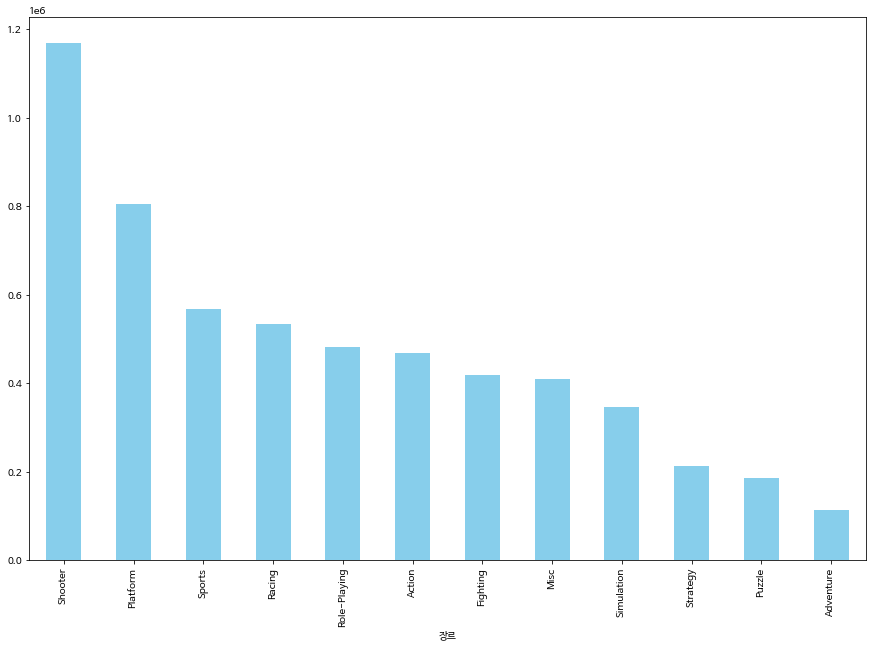

In [102]:
#최근 10년 내 출시된 게임 중 평균 출고량이 높은 장르 순위 -> Shooter, Platform, Sports는 상위 출고량 3 순위
plt.figure(figsize=(15,10))

a=data[data['출시 연도']>=2010].groupby('장르')['총 출고량'].mean().sort_values(ascending=False)
a.plot(kind='bar',color=['skyblue']);

In [56]:
#출고량 상위 3개의 장르 평균 비교 -> 과연 출고량에서 유의미한 차이가 있을까? (Anova Test)
#귀무가설: 세 개 장르 출고량 '평균'의 차이가 유의미하지 않다.
#대립가설: 세 개 장르 출고량 '평균'의 차이가 유의미하다. (적어도 한 가지는 다르다.)

from scipy import stats

recent=data[data['출시 연도']<=2010]

group1=recent[recent['장르']=='Shooter']['총 출고량']
group2=recent[recent['장르']=='Platform']['총 출고량']
group3=recent[recent['장르']=='Sports']['총 출고량']

#등분산 검정: 분석결과 유의수준 0.05에서 귀무가설을 기각하지 못함 -> 등분산 가정 만족
print(stats.bartlett(group1, group2, group3),stats.fligner(group1, group2, group3) ,stats.levene(group1, group2, group3), sep="\n")

#ANOVA test 시행: 귀무가설 기각
stats.f_oneway(group1, group2, group3).pvalue<0.5 

BartlettResult(statistic=222.503803019218, pvalue=4.8296212435212244e-49)
FlignerResult(statistic=80.36204496210733, pvalue=3.544897312958483e-18)
LeveneResult(statistic=9.456923217280023, pvalue=8.01010192943862e-05)


True

In [82]:
#TTEST
#귀무가설: Shooter, Platform 두 그룹간 평균의 차이가 유의미하지 않다.
#대립가설: Shooter의 평균이 Platform의 평균보다 더 크다.
stats.ttest_ind(group1, group2, equal_var = False, alternative = 'greater') #귀무가설 기각 x -> 유의미하지 않다.

Ttest_indResult(statistic=-2.796085324169264, pvalue=0.9973706014023317)

In [84]:
#TTEST
#귀무가설: Platform, Sports 두 그룹간 평균의 차이가 유의미하지 않다.
#대립가설: Platform의 평균이 Sports의 평균보다 더 크다.
stats.ttest_ind(group2, group3, equal_var = False, alternative = 'greater') #귀무가설 기각 -> Platform이 더 크다.

Ttest_indResult(statistic=3.727508765627852, pvalue=0.00010134661824653249)

ANOVA 검정 시행 결과, 세 개 장르 출고량 평균이 적어도 한 가지는 다르다. 또, T-test 시행 결과, Shooter, Platform의 출고량 평균의 차이는 유의미하지 않고, Platform은 Sports에 비해서 높다는 것을 알 수 있다.

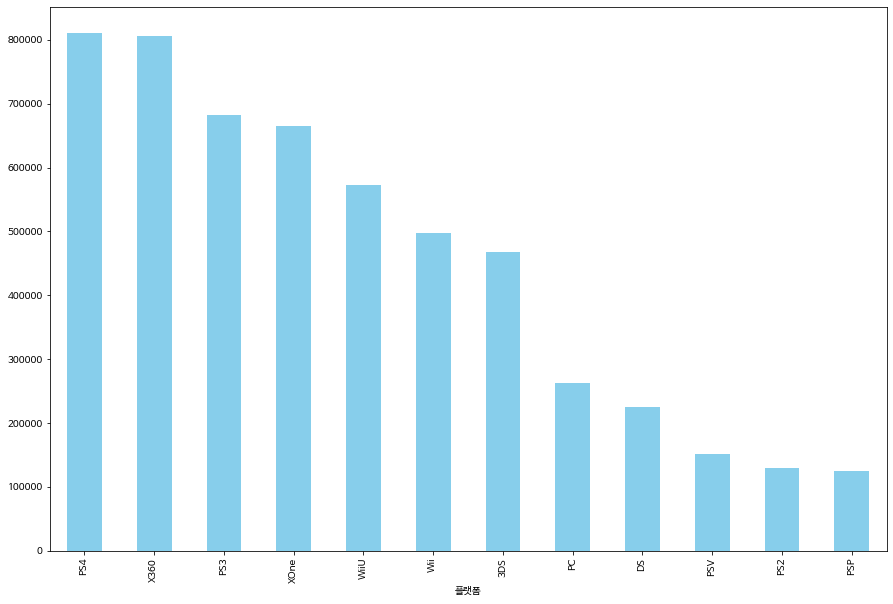

In [96]:
#최근 10년 내 출시된 게임 중 평균 출고량이 높은 플랫폼 순위 -> PS4, X360, PS3이 상위 출고량 3 순위
plt.figure(figsize=(15,10))

a=data[data['출시 연도']>=2010].groupby('플랫폼')['총 출고량'].mean().sort_values(ascending=False)
a.plot(kind='bar',color=['skyblue']);

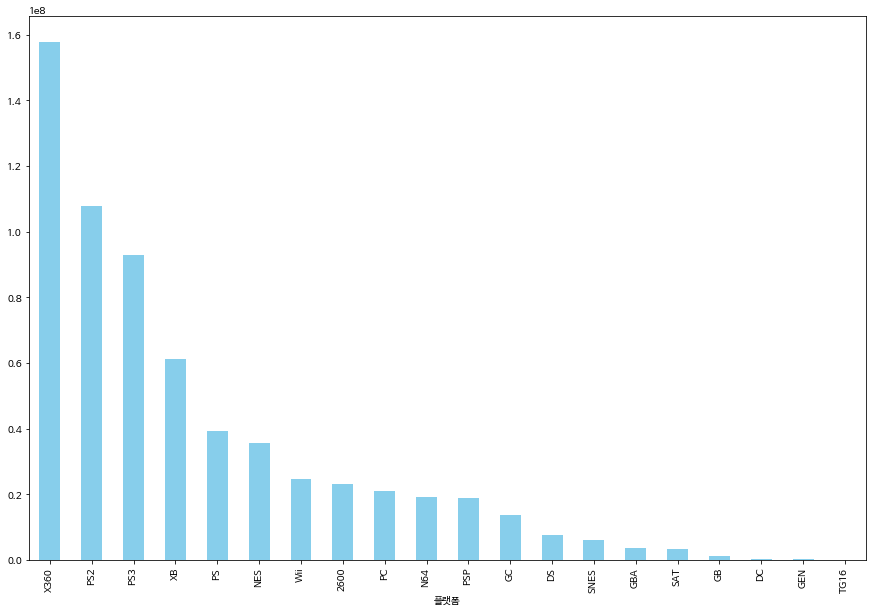

In [93]:
#최근 10년 내 출시된 게임 중 Shooter 장르의 출고량이 가장 많은 플랫폼? -> X360
plt.figure(figsize=(15,10))

b=recent[recent['장르']=='Shooter'].groupby('플랫폼')['총 출고량'].sum().sort_values(ascending=False)
b.plot(kind='bar',color=['skyblue']);

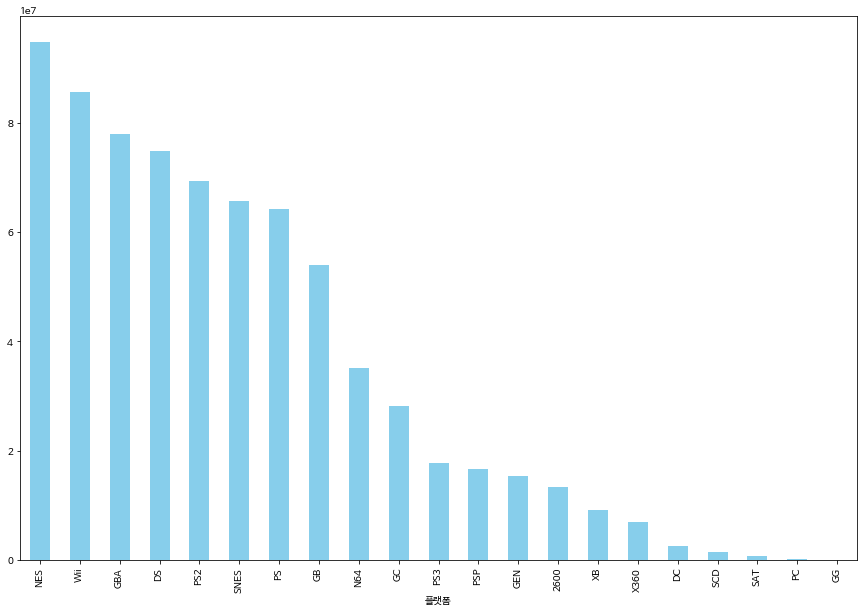

In [92]:
#최근 10년 내 출시된 게임 중 Platform 장르의 출고량이 가장 많은 플랫폼? -> NES
plt.figure(figsize=(15,10))

c=recent[recent['장르']=='Platform'].groupby('플랫폼')['총 출고량'].sum().sort_values(ascending=False)
c.plot(kind='bar',color=['skyblue']);

In [109]:
#장르와 플랫폼 사이에는 연관이 있을까?
#귀무가설: 플랫폼과 장르 사이에는 연관이 있다.
#대립가설: 플랫폼과 장르 사이에는 연관이 없다.
cross_data=data[['장르','플랫폼','총 출고량']]
cross_data=pd.crosstab(cross_data['장르'],cross_data['플랫폼'])
cross_data
from scipy.stats import chi2_contingency
chi2=chi2_contingency(cross_data)
chi2[1] #p-value가 0.05보다 작으므로 귀무가설을 기각한다. 즉, 플랫폼과 장르 사이에는 연관이 없다.

0.0

##3.데이터 분석 결과

###Q 다음 분기에 어떤 게임을 설계해야 할까?
- 주어진 데이터:게임 이름/플랫폼/출시 연도/장르/제작 회사/지역 별(북미, 유럽, 일본, 기타) 출고량

###분석 내용
####1. 지역에 따라서 선호하는 게임 장르
- 각 지역에서 어떤 장르가 가장 출고량이 많을까? 
  - 북미지역은 Platform, 유럽지역은 Shooter, 일본지역은 Role-Playing, 기타지역은 Shooter이 평균적으로 큰 출고량을 차지함
  - 북미지역은 platform>shooter>sports>racing 장르 순으로, 유럽지역은 shooter>platform>racing>sports 장르 순으로, 일본지역은 role-playing>platform>fighting>puzzle 장르 순으로, 기타지역은 shooter>racing>platform>sports 장르 순으로 출고량이 많았음
  - 일본지역을 제외한 나머지 세 지역에서는 platform, shooter, sports, racing이 출고량이 높았고 이를 제외한 다른 장르도 거의 비슷한 형태를 보임. 즉, role-playing이 가장 출고량이 높았던 일본지역을 제외한 다른 지역에서는 선호하는 게임 장르가 유사함

  --> 결론: 만약에 새로운 게임을 북미지역, 유럽지역, 기타지역에서 출시한다면, Shooter장르, Platform장르가 좋을 것으로 판단. 또한, shooter 장르의 경우, 일본에서는 출시하지 않는 것이 좋을 것으로 보임
  

####2. 연도별 게임의 트렌드
- 연도 별 게임 전체 트렌드(시기에 따른 전체 게임 트렌드)
  - 연도 별 총 출고량을 확인한 결과, 과거부터 출고량이 지속적으로 상승하다가 1995년부터 급격히 상승하여 2007-2009년 전 후로 정점을 찍고, 급격히 출고량이 감소하는 양상을 보임

- 연도 별 게임 장르 트렌드 
  - 어떤 장르가 크게 증가했을까? 
    - 연도 별로 각 장르의 총 출고량을 그래프로 확인해본 결과, Action, Sports, Shooter, Misc은 2010년 전후로 크게 출고량이 증가
  - 연도 별로 어떤 장르가 가장 많이 출시되었을까? 
    - 이를 파악하기 위해 각 년도마다 최대 count인 장르를 추출해 분석한 결과, 1994년부터 2002년까지 Sports 장르가 가장 많이 출시되었고, 2003년부터 2016년도에 Action 장르가 가장 많이 출시됨
  - 연도 별로 어떤 장르의 출고량이 가장 많았을까? 
    - 이를 파악하기 위해 각 년도마다 최대 출고량인 장르를 추출해 분석한 결과, 2007년부터 2012년에는 Platfrom 장르의 출고량이 가장 많이 차지했고, 비교적 최근인 2013년부터 2016년도까지 Shooter 장르의 출고량이 가장 많았음

  --> 결론: 전체 트렌드 분석 결과, 전반적인 트렌드는 감소하는 형태임. 연도 별 게임 장르 트렌드 분석결과, 2003년 ~ 2016년에 Action 장르가 가장 많이 출시되었으나, 출고량을 확인해본 결과, 2007 ~ 2012년에는 Platform 장르의 출고량이 가장 많았고, 2013~2016년에도 역시 Action 장르가 아닌 Shooter 장르의 출고량이 가장 많았음


####3. 출고량이 높은 게임에 대한 분석

- (전 시기) 출고량 제일 많은 게임 5개: Wii Sports, Super Mario Bros., Mario Kart Wii, Wii Sports Resort, Pokemon Red/Pokemon Blue
  - 특이점: 이 중 세 게임의 플랫폼은 'Wii'이고, 제작 회사는 5 개모두 'Nintendo'

- 최근 10년 내에 출시된 게임 중 출고량 제일 많은 게임 5개: Kinect Adventures!, Grand Theft Auto V, Grand Theft Auto V, Call of Duty: Modern Warfare 3, Call of Duty: Black Ops
  - 특이점: 이 중 네 게임의 플랫폼이 'X360'이고, 장르는 'Shooter', 'Action'이 각각 2개 씩 차지

- 최근 10년 내 출시된 게임 중 평균 출고량이 높은 장르 순위: Shooter, Platform, Sports
  - 과연 출고량에서 유의미한 차이가 있을까? (Anova Test/T-test)
    - 출고량 상위 3개의 장르 평균을 비교하기 위해 ANOVA 검정 시행 결과, 세 개 장르 출고량 평균이 적어도 한 가지는 다르다. 또, T-test 시행 결과, Shooter, Platform의 출고량 평균의 차이는 유의미하지 않고, Platform은 Sports에 비해서 높다는 것을 알 수 있음

- 최근 10년 내 출시된 게임 중 평균 출고량이 높은 플랫폼 순위: PS4, X360, PS3
  - 최근 10년 내 출시된 게임 중 Shooter 장르의 출고량이 가장 많은 플랫폼: X360
  - 최근 10년 내 출시된 게임 중 Platform 장르의 출고량이 가장 많은 플랫폼: NES
  - 장르와 플랫폼 사이에는 연관이 있을까? 
    - 카이스퀘어 검정 결과, 플랫폼과 장르 사이에 연관성은 없다.

  --> 결론: 최근 10년 내 출시된 게임 중 출고량이 많았던 5개의 게임 중 4 개의 플랫폼은 'X360'임. 최근 평균 출고량이 높은 장르 순위는 Shooter, Platform, Sports이었고, 이들 중 Shooter, Platform이 평균적으로 높았다. 마지막으로, 물론 장르와 플랫폼 사이에 연관성은 없어 특정 플랫폼이 특정 장르를 독점하고 있지는 않지만, 최근 Shooter 장르의 출고량이 가장 많았던 플랫폼은 'X360', 최근 Platform 장르의 출고량이 가장 많은 플랫폼은 'NES'로, 만약 Shooter 장르의 게임을 출시한다면 'X360'플랫폼을, 만약 Platform 장르의 게임을 출시한다면 'NES' 플랫폼을 선정하는 것이 좋다고 판단


###분석 결과
- 게임 장르: Shooter 혹은 Platform 장르 선정
- 게임 지역: Shooter의 경우, 일본 지역을 제외한 전 지역에서 출시하고, Platform의 경우, 일본 지역을 포함한 전 지역에서 출시
- 게임 플랫폼: Shooter 장르 출시할 경우 'X360' 플랫폼과 협력, Platform 장르 출시할 경우 'NES' 플랫폼과 협력